# El Problema de la caja de fósforos de Banach

El célebre matemático polaco Stefan Banach solía reunirse con otros matemáticos en el Café Escocés en Lwów, Polonia, en donde había un cuaderno en el cual se anotaban los problemas planteados y sus soluciones. Esta libreta se conoce como el Libro Escocés. El siguiente es el último problema incluido en este libro).

En todo momento, Banach lleva $2$ cajas de fósforos: una en su bolsillo izquierdo y otra en su bolsillo derecho. Cada vez que necesita un fósforo, es igualmente probable que lo saque de cualquier bolsillo. Considere el momento en que Banach descubre por primera vez que una de sus cajas de fósforos está vacía. 
 
 #### Si se supone que ambas cajas de fósforos inicialmente contenían $N$ fósforos, ¿cuál es la probabilidad de que haya exactamente $k$ fósforos, $k=0,1,\dots, N$, en la otra caja?

# >Inicia ejercicio<

La variable **conta** inicializa en $-1$ ya que es la que cuenta cuantos cerillos tiene la otra caja 

In [129]:
import random

def Banach(n):
    c0 = [0 for i in range(n+1)]
    c1 = [1 for i in range(n+1)]
    c = [c0,c1]

    conta = -1
    
    while len(c0)>0 and len(c1)>0:
    #while c0 and c1:
        elec = random.choice(random.choice(c))
        if elec == 0:
            c0.remove(elec)
        else: c1.remove(elec)
            
        conta+=1
        c = [c0,c1]

    print("La longitud de c0 es:",len(c0))
    print(c0)
    print(c1)
    if c0: #Si la lista c0 es no vacia
        return 0,conta,len(c0)-1
    else: return 1,conta,len(c1)-1

In [132]:
B = Banach(10)

print("Banach usó: ", B[1], 
      "cerrilos, antes de vaciar la caja", 1-B[0], "y la otra cajita",B[0],"quedo con", B[2], "fosforós")

La longitud de c0 es: 4
[0, 0, 0, 0]
[]
Banach usó:  17 cerrilos, antes de vaciar la caja 1 y la otra cajita 0 quedo con 3 fosforós


Esta función es la que hicimos con Memo, pero con algunas modificaciones, expuestas anteriormente. 

In [280]:
def construccionBanch(n):
    c0 = [0 for i in range(n+1)]
    c1 = [1 for i in range(n+1)]
    c = [c0,c1]

    conta = -1
    
    while len(c0)>0 and len(c1)>0:
    #while c0 and c1:
        elec = random.choice(random.choice(c))
        if elec == 0:
            c0.remove(elec)
        else: c1.remove(elec)
            
        conta+=1
        c = [c0,c1]

    if c0: #Si la lista c0 es no vacia
        #print(len(c0)-1)
        return len(c0)-1
    else: 
        #print(len(c1)-1)
        return len(c1)-1
    


## 1. Función experimento
La función **experimento** recibe dos parametros, el primero $n$ es el número de cerillos que habrá en las dos cajas, es decir, en cada caja habrá $n$ cerillos, el segundo parámetro $rep$ es el número de veces que se repetira el experimento

In [286]:
import random #Para poder usar la función que generar pseudoaleatorios
from collections import defaultdict #Para inicializar el diccionario


def experimento(n,rep):
    #Estamos diciendo que dictLan es un diccionario de tipo integer
    dictLan = defaultdict(int)
    
    #Ponemos las posibles claves que puede tomar el resultado
    for i in range (1,n+1):
        dictLan[i]
    
    for i in range(rep):
        res = construccionBanch(n)
        if res != 0:
            dictLan[res]+=1
        #print(res)
    #Devuelve un diccionario
    return dictLan


In [287]:
f = experimento(11,12) #Simple ejemplo de tener 11 cerillos en dos cajas y repetirlo 12 veces
f

defaultdict(int,
            {1: 0,
             2: 1,
             3: 2,
             4: 1,
             5: 3,
             6: 0,
             7: 2,
             8: 0,
             9: 0,
             10: 0,
             11: 0})

## Vamos a simular lo que pidio Memo, es decir, repetiremos el experimento $100,000$ veces teniendo 10 cerillos cada caja y obtenemos la siguiente gráfica.

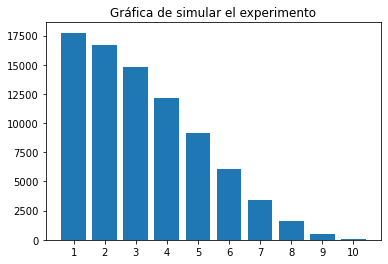

In [289]:
from collections import Counter
import matplotlib.pyplot as plt 

# f es nuestro diccionario de donde tomamos los valores
f = experimento(10,100000)

#No tuvimos que usar items para gráficar
plt.bar(range(len(f)), f.values(), align='center') 
plt.xticks(range(len(f)), list(f.keys())) 

# Titulo de la imagen
plt.title("Gráfica de simular el experimento")

#Función que al generar la imagen la guardará en la carpeta donde se encuentra tu jupyter
plt.savefig("Banch1.jpg")

#Muestra la gráfica
plt.show()

## Ahora teniendo 20 cerillos en cada caja...

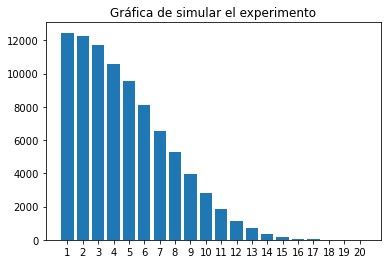

In [290]:
from collections import Counter
import matplotlib.pyplot as plt 

# f es nuestro diccionario de donde tomamos los valores
f = experimento(20,100000)

#No tuvimos que usar items para gráficar
plt.bar(range(len(f)), f.values(), align='center') 
plt.xticks(range(len(f)), list(f.keys())) 

# Titulo de la imagen
plt.title("Gráfica de simular el experimento")

#Función que al generar la imagen la guardará en la carpeta donde se encuentra tu jupyter
plt.savefig("Banch1.jpg")

#Muestra la gráfica
plt.show()

## Ahora teniendo $100$ cerillos en cada caja.
Si bajas este archivo puede que tarde un poco tu equipo en obtener esta gráfica. 

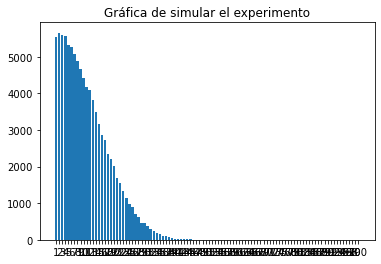

In [291]:
from collections import Counter
import matplotlib.pyplot as plt 

# f es nuestro diccionario de donde tomamos los valores
f = experimento(100,100000)

#No tuvimos que usar items para gráficar
plt.bar(range(len(f)), f.values(), align='center') 
plt.xticks(range(len(f)), list(f.keys())) 

# Titulo de la imagen
plt.title("Gráfica de simular el experimento")

#Función que al generar la imagen la guardará en la carpeta donde se encuentra tu jupyter
plt.savefig("Banch1.jpg")

#Muestra la gráfica
plt.show()